In [1]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter
import pandas as pd
from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import column
import pandas_bokeh
import numpy as np
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
from scipy import stats
pd.set_option("display.max_columns", None)

Loading BokehJS ...

In [2]:
def get_attributes(column, act_sheet):
    data = []
    for row in (list(range(9,19)) + list(range(20,30))+ list(range(31,42))):
        char = get_column_letter(column)
        data.append(act_sheet[char + str(row)].value)
    return data

In [3]:
fields = {'day':2, 'PE06':3, 'PE12':4,
          'PE18':5, 'PE00':6, 'PM06':7,
          'PM12':8, 'PM18':9, 'PM00':10,
          'TM06':11, 'TM12':12, 'TM18':13,
          'TM00':14, 'TMax':18, 'TMin':19,
          'TV06':20, 'TV12':21, 'TV18':22,
          'TV00':23, 'Prec':24}

In [4]:
df = pd.DataFrame()
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith(".xlsx"):
             df_temp = pd.DataFrame()
             path = os.path.join(root,file)
             book = load_workbook(path)
             active_sheet = book['SECC1']
             # Get Month from Sheet
             char = get_column_letter(8)
             month = active_sheet[char + str(2)].value
             # Get Year from Sheet
             char = get_column_letter(12)
             year = active_sheet[char + str(2)].value
             print(f"Getting data from Year: {year} Month: {month} ")   
             for (field, column) in fields.items():                
                df_temp[field] = get_attributes(column, active_sheet)    
             df_temp = df_temp[pd.notna(df_temp['PE06'])]
             df_temp['month'] = month
             df_temp['year'] = year
             if len(df) == 0:
                 df = df_temp
             else:
                 df = df.append(df_temp)    

             

Getting data from Year: 2017 Month: 2 
Getting data from Year: 2017 Month: 3 
Getting data from Year: 2017 Month: 4 
Getting data from Year: 2017 Month: 5 
Getting data from Year: 2017 Month: 6 
Getting data from Year: 2017 Month: 7 
Getting data from Year: 2017 Month: 8 
Getting data from Year: 2017 Month: 9 
Getting data from Year: 2017 Month: 10 
Getting data from Year: 2017 Month: 11 
Getting data from Year: 2017 Month: 12 
Getting data from Year: 2018 Month: 1 
Getting data from Year: 2018 Month: 2 
Getting data from Year: 2018 Month: 3 
Getting data from Year: 2018 Month: 4 
Getting data from Year: 2018 Month: 5 
Getting data from Year: 2018 Month: 6 
Getting data from Year: 2018 Month: 7 
Getting data from Year: 2018 Month: 8 
Getting data from Year: 2018 Month: 9 
Getting data from Year: 2018 Month: 10 
Getting data from Year: 2018 Month: 11 
Getting data from Year: 2018 Month: 12 
Getting data from Year: 2019 Month: 1 
Getting data from Year: 2019 Month: 2 
Getting data from Y

In [5]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [6]:
df.describe()

,day,PE06,PE12,PE18,PE00,PM06,PM12,PM18,PM00,TM06,TM12,TM18,TM00,TMax,TMin,TV06,TV12,TV18,TV00,Prec,month,year
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1609.00000,1609.000000,1609.000000,1609.000000,771.000000,1610.000000,1610.000000
mean,15.701242,985.470621,985.559696,985.573714,985.642497,986.389112,986.472714,986.485565,985.882000,-4.546832,-4.018634,-3.014472,-3.932919,-0.491211,-7.506503,3.69399,3.731889,3.912554,3.757806,2.991258,6.291925,2018.809317
std,8.788280,13.386887,13.229778,13.273085,13.368861,13.321028,13.307854,13.297891,29.826726,6.353285,6.512361,6.524813,6.595297,5.821592,7.199728,1.49259,1.490715,1.429036,1.437665,4.742694,3.392017,1.302209
min,1.000000,915.200000,940.200000,937.300000,935.600000,945.800000,923.300000,938.100000,-82.800000,-33.600000,-33.000000,-33.000000,-36.000000,-28.000000,-40.000000,0.10000,0.000000,0.000000,0.100000,0.000000,1.000000,2017.000000
25%,8.000000,976.100000,976.600000,976.500000,976.500000,977.000000,977.525000,977.300000,977.400000,-8.000000,-7.600000,-6.400000,-7.500000,-3.500000,-11.357500,2.70000,2.700000,2.900000,2.800000,0.200000,3.000000,2018.000000
50%,16.000000,984.950000,984.650000,984.900000,985.100000,985.850000,985.700000,985.800000,986.000000,-2.700000,-2.400000,-1.500000,-2.200000,0.800000,-5.550000,3.90000,3.800000,4.100000,3.900000,1.200000,6.000000,2019.000000
75%,23.000000,994.500000,994.575000,994.500000,994.600000,995.400000,995.475000,995.400000,995.500000,0.000000,0.600000,1.775000,0.875000,3.800000,-2.000000,4.70000,4.700000,4.900000,4.800000,3.700000,9.000000,2020.000000
max,31.000000,1024.500000,1024.900000,1024.300000,1022.500000,1025.000000,1025.800000,1025.200000,1023.400000,18.200000,14.200000,13.600000,7.600000,11.600000,3.500000,22.50000,20.000000,9.200000,9.300000,39.000000,12.000000,2021.000000


# Analisis de Outliers

Teniendo en cuenta que las presiones máximas y mínimas deben encontrarse entre 900 - 1050 hPa encotramos que para PM00 aparece una presion de -82.8 hPa lo que nos indica un claro error en al menos uno de los datos. Procedemos a encontrar todos los valores sobre el campo antes mencionado cuyo valor sea menor a 900 hPa

In [7]:
df.loc[df['PM00'] < 900, ['date', 'PM00']]

,date,PM00
30,2018-05-31,-82.8


De la busqueda resulta que solo un valor cumple este criterio y se da para el dia 31-05-2018. Se procede a reemplazar dicho valor por la media de PM00

In [8]:
df.loc[df['PM00']<900, 'PM00'] = df['PM00'].mean()
df.describe()

,day,PE06,PE12,PE18,PE00,PM06,PM12,PM18,PM00,TM06,TM12,TM18,TM00,TMax,TMin,TV06,TV12,TV18,TV00,Prec,month,year
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1609.00000,1609.000000,1609.000000,1609.000000,771.000000,1610.000000,1610.000000
mean,15.701242,985.470621,985.559696,985.573714,985.642497,986.389112,986.472714,986.485565,986.545778,-4.546832,-4.018634,-3.014472,-3.932919,-0.491211,-7.506503,3.69399,3.731889,3.912554,3.757806,2.991258,6.291925,2018.809317
std,8.788280,13.386887,13.229778,13.273085,13.368861,13.321028,13.307854,13.297891,13.393454,6.353285,6.512361,6.524813,6.595297,5.821592,7.199728,1.49259,1.490715,1.429036,1.437665,4.742694,3.392017,1.302209
min,1.000000,915.200000,940.200000,937.300000,935.600000,945.800000,923.300000,938.100000,936.400000,-33.600000,-33.000000,-33.000000,-36.000000,-28.000000,-40.000000,0.10000,0.000000,0.000000,0.100000,0.000000,1.000000,2017.000000
25%,8.000000,976.100000,976.600000,976.500000,976.500000,977.000000,977.525000,977.300000,977.400000,-8.000000,-7.600000,-6.400000,-7.500000,-3.500000,-11.357500,2.70000,2.700000,2.900000,2.800000,0.200000,3.000000,2018.000000
50%,16.000000,984.950000,984.650000,984.900000,985.100000,985.850000,985.700000,985.800000,986.000000,-2.700000,-2.400000,-1.500000,-2.200000,0.800000,-5.550000,3.90000,3.800000,4.100000,3.900000,1.200000,6.000000,2019.000000
75%,23.000000,994.500000,994.575000,994.500000,994.600000,995.400000,995.475000,995.400000,995.500000,0.000000,0.600000,1.775000,0.875000,3.800000,-2.000000,4.70000,4.700000,4.900000,4.800000,3.700000,9.000000,2020.000000
max,31.000000,1024.500000,1024.900000,1024.300000,1022.500000,1025.000000,1025.800000,1025.200000,1023.400000,18.200000,14.200000,13.600000,7.600000,11.600000,3.500000,22.50000,20.000000,9.200000,9.300000,39.000000,12.000000,2021.000000


# Busqueda de faltantes en los datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 29
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1610 non-null   int64         
 1   PE06    1610 non-null   float64       
 2   PE12    1610 non-null   float64       
 3   PE18    1610 non-null   float64       
 4   PE00    1610 non-null   float64       
 5   PM06    1610 non-null   float64       
 6   PM12    1610 non-null   float64       
 7   PM18    1610 non-null   float64       
 8   PM00    1610 non-null   float64       
 9   TM06    1610 non-null   float64       
 10  TM12    1610 non-null   float64       
 11  TM18    1610 non-null   float64       
 12  TM00    1610 non-null   float64       
 13  TMax    1610 non-null   float64       
 14  TMin    1610 non-null   float64       
 15  TV06    1609 non-null   float64       
 16  TV12    1609 non-null   float64       
 17  TV18    1609 non-null   float64       
 18  TV00    16

Del uso del método "info()" podemos obserbar que tenemos en total 1610 muestras y que se presentan faltantes en las features "TV06", "TV12", "TV18", "TV00" y "Prec". 
"TVXX" se refiere al parámetro meteorológico "Tension del Vapor medido a la hora XX", podemos obsevar que para los 4 casos solo se encuentra un faltante. 

In [10]:
print(df.loc[df['TV06'].isnull() , 'date'])
print(df.loc[df['TV12'].isnull() , 'date'])
print(df.loc[df['TV18'].isnull() , 'date'])
print(df.loc[df['TV00'].isnull() , 'date'])

11   2017-02-12
Name: date, dtype: datetime64[ns]
11   2017-02-12
Name: date, dtype: datetime64[ns]
11   2017-02-12
Name: date, dtype: datetime64[ns]
11   2017-02-12
Name: date, dtype: datetime64[ns]


Podemos observar que en todos los caso el dato faltante se produjo el mismo dia, como criterio colocaremos entonces para todos los casos como valor la media de la feature. 

In [15]:
df.loc[df['TV06'].isnull(), 'TV06'] = df['TV06'].mean()
df.loc[df['TV12'].isnull(), 'TV12'] = df['TV12'].mean()
df.loc[df['TV18'].isnull(), 'TV18'] = df['TV18'].mean()
df.loc[df['TV00'].isnull(), 'TV00'] = df['TV00'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1610 non-null   int64         
 1   PE06    1610 non-null   float64       
 2   PE12    1610 non-null   float64       
 3   PE18    1610 non-null   float64       
 4   PE00    1610 non-null   float64       
 5   PM06    1610 non-null   float64       
 6   PM12    1610 non-null   float64       
 7   PM18    1610 non-null   float64       
 8   PM00    1610 non-null   float64       
 9   TM06    1610 non-null   float64       
 10  TM12    1610 non-null   float64       
 11  TM18    1610 non-null   float64       
 12  TM00    1610 non-null   float64       
 13  TMax    1610 non-null   float64       
 14  TMin    1610 non-null   float64       
 15  TV06    1610 non-null   float64       
 16  TV12    1610 non-null   float64       
 17  TV18    1610 non-null   float64       
 18  TV00    16

Para el caso de la feature "Prec" (correspondiente a precipitaciones en mm) el faltante se debe a que si en el día no se produjeron precipitaciones la medición no se realiza. Que es equivalente a decir que cayo 0 mm de precipitaciones. Por eso se reemplaza todo los valores nulos con el valor 0.

In [16]:
df.loc[df['Prec'].isnull(), 'Prec'] = 0.0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1610 non-null   int64         
 1   PE06    1610 non-null   float64       
 2   PE12    1610 non-null   float64       
 3   PE18    1610 non-null   float64       
 4   PE00    1610 non-null   float64       
 5   PM06    1610 non-null   float64       
 6   PM12    1610 non-null   float64       
 7   PM18    1610 non-null   float64       
 8   PM00    1610 non-null   float64       
 9   TM06    1610 non-null   float64       
 10  TM12    1610 non-null   float64       
 11  TM18    1610 non-null   float64       
 12  TM00    1610 non-null   float64       
 13  TMax    1610 non-null   float64       
 14  TMin    1610 non-null   float64       
 15  TV06    1610 non-null   float64       
 16  TV12    1610 non-null   float64       
 17  TV18    1610 non-null   float64       
 18  TV00    16

# Agregado de Feature TMean
Se agrega el campo TMean = (TM06 + TM12 + TM16 + TM00) / 4
Este campo corresponde a la temperatura Media de cada dia.

In [17]:
df['TMean'] = (df['TM06'] + df['TM12'] + df['TM18'] + df['TM00']) / 4

# Gráficos
## Precipitaciones

In [20]:
df_month = df.groupby(['year', 'month']).sum()
df_month = df_month.reset_index()
df_month = df_month.pivot(index='month', columns= 'year', values= 'Prec' )
df_month = df_month.rename(index={1:'Ene', 2:'Feb', 3:'Mar', 4:'Abr',
                        5:'May', 6:'Jun', 7:'Jul', 8:'Ago',
                        9:'Sep', 10:'Ago', 11:'Nov', 12:'Dic'})

df_year = df.groupby(['year']).sum()
df_year

p_bar_month = df_month.plot_bokeh.bar(sizing_mode = "stretch_both",
    ylabel="Precipitaciones (mm)",
    xlabel='Mes', 
    title="Precipitaciones Mensuales", 
    alpha=0.6,     
    zooming=False   
    )
p = figure(title="Precipitaciones Anuales",
           sizing_mode = "stretch_both",
           plot_width=500, plot_height=400,
           x_axis_label="Año",
           y_axis_label="Precipitaciones (mm)")
p.vbar(x=df_year.index, top=df_year['Prec'], width=0.9)
show(p)

## Temperaturas Diarias

In [21]:
df_aux = df.copy()
df_aux['day'] = df_aux.date.dt.dayofyear
df_aux = df_aux.pivot_table(index='day', columns='year', values='TMean', aggfunc='mean')
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Dia del Año', 
                  title="Temperatura Media",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")
df_aux = df.copy()
df_aux['day'] = df_aux.date.dt.dayofyear
df_aux = df_aux.pivot_table(index='day', columns='year', values='TMax', aggfunc='mean')
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Dia del Año', 
                  title="Temperatura Máxima",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")
df_aux = df.copy()
df_aux['day'] = df_aux.date.dt.dayofyear
df_aux = df_aux.pivot_table(index='day', columns='year', values='TMin', aggfunc='mean')
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Dia del Año', 
                  title="Temperatura Mínima",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")

Figure(id='1892', ...)

## Promedio Temperaturas Mensuales

In [22]:
df_aux = df.copy()
df_aux['month'] = df_aux.date.dt.month
df_aux = df_aux.pivot_table(index='month', columns='year', values='TMean', aggfunc='mean')
df_aux = df_aux.sort_values(by='month')
df_aux = df_aux.rename(index={1:'Ene', 2:'Feb', 3:'Mar',
                     4:'Abr', 5:'May', 6:'Jun',
                     7:'Jul', 8:'Ago', 9:'Sep',
                     10:'Oct', 11:'Nov', 12:'Dic'})
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Mes del Año',                   
                  title="Promedio de Temperatura Media Mensual",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")
df_aux = df.copy()
df_aux['month'] = df_aux.date.dt.month
df_aux = df_aux.pivot_table(index='month', columns='year', values='TMax', aggfunc='mean')
df_aux = df_aux.sort_values(by='month')
df_aux = df_aux.rename(index={1:'Ene', 2:'Feb', 3:'Mar',
                     4:'Abr', 5:'May', 6:'Jun',
                     7:'Jul', 8:'Ago', 9:'Sep',
                     10:'Oct', 11:'Nov', 12:'Dic'})
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Mes del Año',                   
                  title="Promedio de Temperatura Máxima Mensual",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")
df_aux = df.copy()
df_aux['month'] = df_aux.date.dt.month
df_aux = df_aux.pivot_table(index='month', columns='year', values='TMin', aggfunc='mean')
df_aux = df_aux.sort_values(by='month')
df_aux = df_aux.rename(index={1:'Ene', 2:'Feb', 3:'Mar',
                     4:'Abr', 5:'May', 6:'Jun',
                     7:'Jul', 8:'Ago', 9:'Sep',
                     10:'Oct', 11:'Nov', 12:'Dic'})
df_aux.plot_bokeh(kind='line',
                  ylabel="Temperatura (°C)",
                  xlabel='Mes del Año',                   
                  title="Promedio de Temperatura Mínima Mensual",
                  sizing_mode = "stretch_both",
                  zooming=False,
                  toolbar_location='above',
                  number_format="1.00")

Figure(id='2857', ...)

In [23]:
df_aux = df.copy()
df_aux['day'] = df_aux.date.dt.dayofyear
df_aux = df_aux.pivot_table(index='day', columns='year', values='TMean', aggfunc='mean')
df_aux.plot_bokeh.hist(
    bins=np.linspace(-40, 10, 41),
    vertical_xlabel=True,
    #hovertool=False,
    xlabel= "Temperatura (°C)",
    xticks=[-40,-30,-20,-10,0,10],
    title="Distribucion de Temperaturas Medias",
    zooming=False,
    line_color="black")

C:\Users\Rodri\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_bokeh\plot.py:766: Warning: There are NaN values in column '2017'. For the histogram, these rows have been neglected.
  warnings.warn(
C:\Users\Rodri\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_bokeh\plot.py:766: Warning: There are NaN values in column '2018'. For the histogram, these rows have been neglected.
  warnings.warn(
C:\Users\Rodri\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_bokeh\plot.py:766: Warning: There are NaN values in column '2019'. For the histogram, these rows have been neglected.
  warnings.warn(
C:\Users\Rodri\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_bokeh\plot.py:766: Warning: There are NaN values in column '2021'. For the histogram, these rows have been neglected.
  warnings.warn(


Figure(id='3209', ...)

# Distribución de probabilidad de temperaturas
De los histogramas podemos apreciar que las temperaturas tienen una funcion distribución de probabilidad que se aproxima bastante a una Rayleigh

## Todos los Años

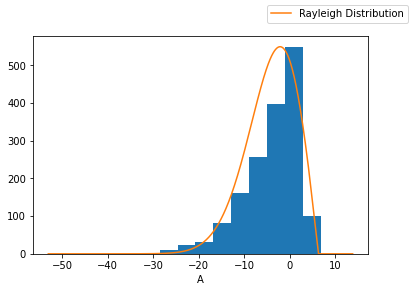

In [48]:
loc, scale = stats.rayleigh.fit(-(df['TMean'].dropna()) +  df['TMean'].max())
xl = np.linspace(-df['TMean'].max(), 60,1000) 
x2 = -(xl - df['TMean'].max())
fig, axe = plt.subplots()
counts, bins = np.histogram(df['TMean'].values, bins=10)
y = stats.rayleigh(scale=scale, loc=loc).pdf(xl)
y = (y / y.max() ) * counts.max() 
axe.hist(bins[:-1], bins, weights=counts)
axe.plot(x2,y, label="Rayleigh Distribution")
plt.xlabel('Temperatura (°C)')
fig.legend()

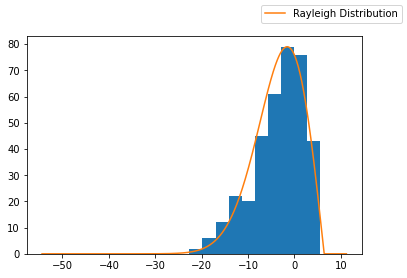

In [35]:
loc, scale = stats.rayleigh.fit(-(df_aux[2020].dropna()) +  df_aux[2020].max())
xl = np.linspace(-df_aux[2020].max(), 60,1000) 
x2 = -(xl - df_aux[2020].max())
fig, axe = plt.subplots()
counts, bins = np.histogram(df_aux[2020].values, bins=10)
y = stats.rayleigh(scale=scale, loc=loc).pdf(xl)
y = (y / y.max() ) * counts.max() 
axe.hist(bins[:-1], bins, weights=counts)
axe.plot(x2,y, label="Rayleigh Distribution")
fig.legend()

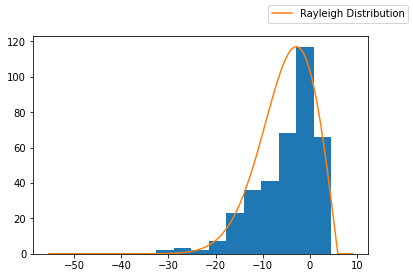

In [39]:
loc, scale = stats.rayleigh.fit(-(df_aux[2019].dropna()) +  df_aux[2019].max())
xl = np.linspace(-df_aux[2019].max(), 60,1000) 
x2 = -(xl - df_aux[2019].max())
fig, axe = plt.subplots()
counts, bins = np.histogram(df_aux[2019].dropna().values, bins=10)
y = stats.rayleigh(scale=scale, loc=loc).pdf(xl)
y = (y / y.max() ) * counts.max() 
axe.hist(bins[:-1], bins, weights=counts)
axe.plot(x2,y, label="Rayleigh Distribution")
fig.legend()

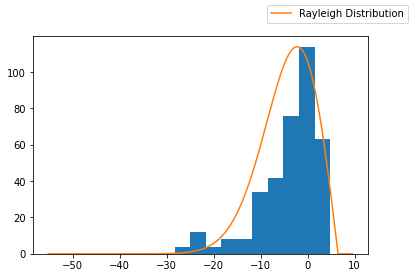

In [40]:
loc, scale = stats.rayleigh.fit(-(df_aux[2018].dropna()) +  df_aux[2018].max())
xl = np.linspace(-df_aux[2018].max(), 60,1000) 
x2 = -(xl - df_aux[2018].max())
fig, axe = plt.subplots()
counts, bins = np.histogram(df_aux[2018].dropna().values, bins=10)
y = stats.rayleigh(scale=scale, loc=loc).pdf(xl)
y = (y / y.max() ) * counts.max() 
axe.hist(bins[:-1], bins, weights=counts)
axe.plot(x2,y, label="Rayleigh Distribution")
fig.legend()

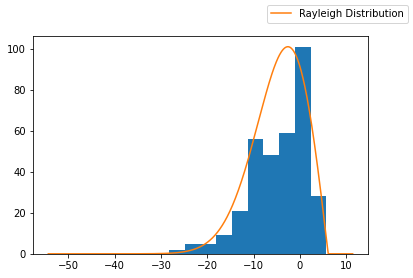

In [41]:
loc, scale = stats.rayleigh.fit(-(df_aux[2017].dropna()) +  df_aux[2017].max())
xl = np.linspace(-df_aux[2017].max(), 60,1000) 
x2 = -(xl - df_aux[2017].max())
fig, axe = plt.subplots()
counts, bins = np.histogram(df_aux[2017].dropna().values, bins=10)
y = stats.rayleigh(scale=scale, loc=loc).pdf(xl)
y = (y / y.max() ) * counts.max() 
axe.hist(bins[:-1], bins, weights=counts)
axe.plot(x2,y, label="Rayleigh Distribution")
fig.legend()